## Drafts for visual analysis of benchmarking results from identification workflow

In [1]:
import glob
from pyteomics import mzid
import numpy as np
import matplotlib.pyplot as plt
import os
from venn import venn

In [2]:
# read in 4 mzid files (one for each merging method)
files = glob.glob('benchmarking/*.mzID')
# names of methods
basenames = [os.path.basename(name) for name in files]

In [3]:
dfs = [mzid.DataFrame(f) for f in files]

In [4]:
def evalue_hist(df, title):
    np.log10(df['MS-GF:EValue']).hist(bins=100)
    plt.title(title)

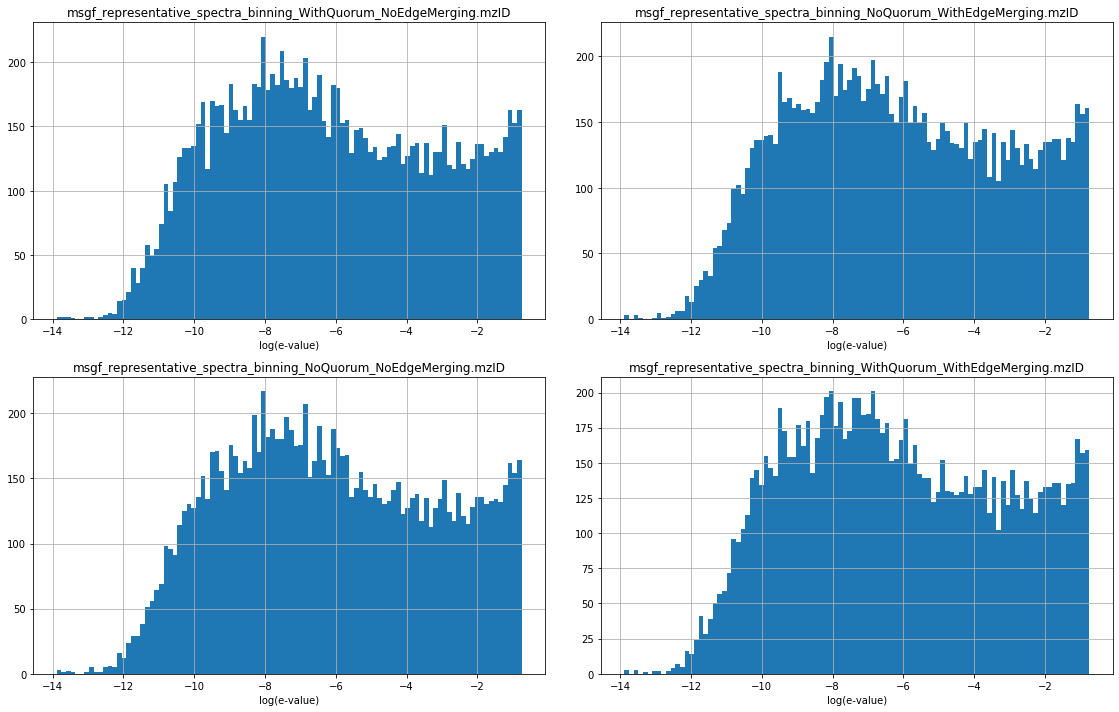

In [5]:
# simple histograms of PSM evalues
plt.figure(figsize=(16, 10))
for i, (name, df) in enumerate(zip(basenames, dfs), 1):
    plt.subplot(2, 2, i)
    evalue_hist(df, name)
    plt.xlabel('log(e-value)')
plt.tight_layout()

### subtract the mean from 4 histograms and plot the difference ###

In [6]:
Nbins = 50
bins = np.linspace(-14, 0, Nbins)
counts = np.empty((4, Nbins-1))
for i, df in enumerate(dfs):
    counts[i, :] = np.histogram(np.log10(df['MS-GF:EValue']), bins=bins)[0]

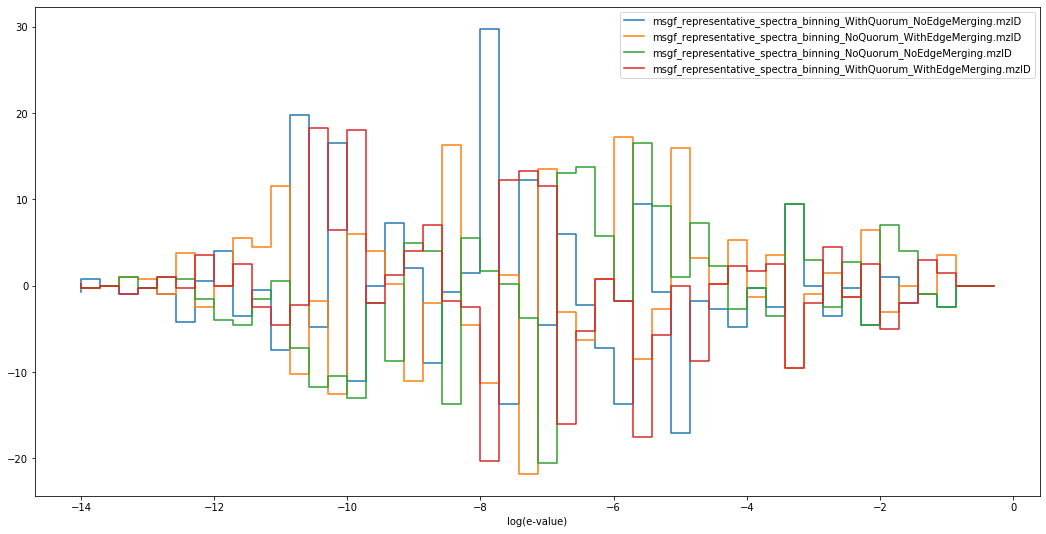

In [7]:
mean = counts.mean(axis=0)
plt.figure(figsize=(18, 9))
plt.step(bins[:-1], (counts-mean).T)
plt.xlabel('log(e-value)')
plt.legend(basenames)

### Bar plots of number of PSMs and peptides

[11862, 11881, 11864, 11877]

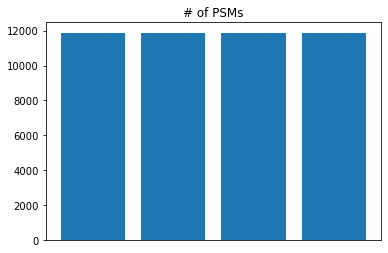

In [8]:
npsms = [df.shape[0] for df in dfs]
plt.bar(range(4), npsms)
plt.xticks([])
plt.title('# of PSMs')
npsms

[1137, 1142, 1138, 1139]

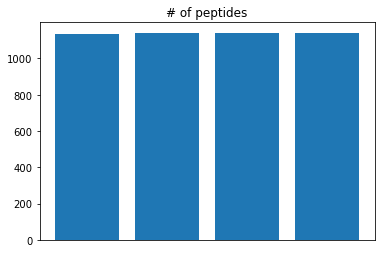

In [9]:
npeptides = [df.drop_duplicates('PeptideSequence').shape[0] for df in dfs]
plt.bar(range(4), npeptides)
plt.xticks([])
plt.title('# of peptides')
npeptides

### Venn diagram of identified peptides

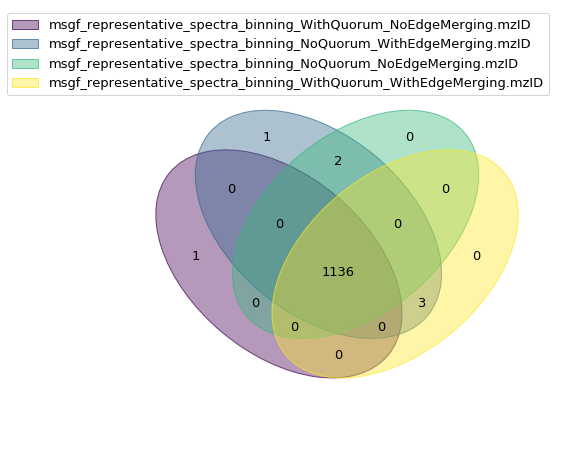

In [10]:
sets = [set(df.PeptideSequence) for df in dfs]
venn(dict(zip(basenames, sets)))